# Load and Inspect the Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-performance-multiple-linear-regression


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.duplicated().sum()

np.int64(127)

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
print(df.dtypes)
display(df.describe())

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# EDA

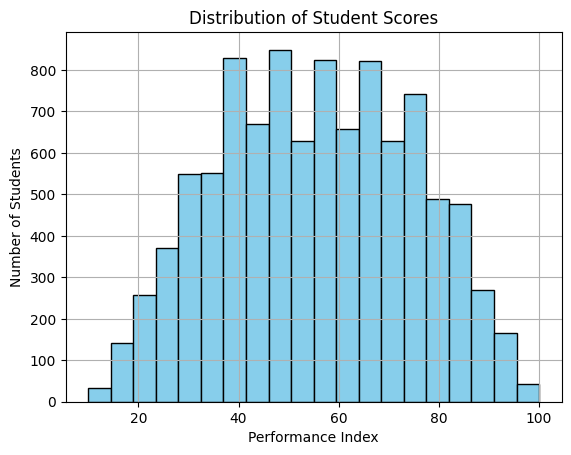

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Performance Index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Student Scores')
plt.xlabel('Performance Index')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

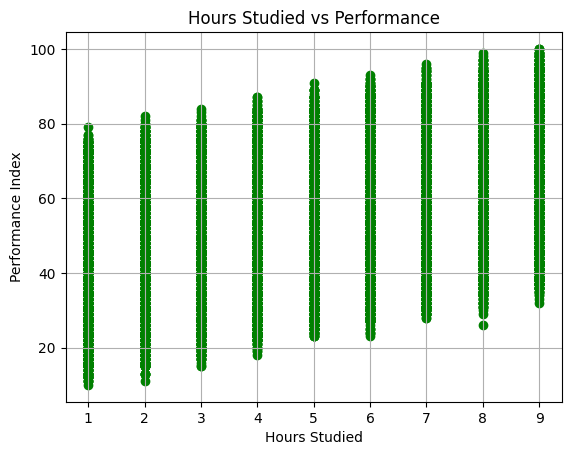

In [ ]:
plt.scatter(df['Hours Studied'], df['Performance Index'], color='green')
plt.title('Hours Studied vs Performance')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

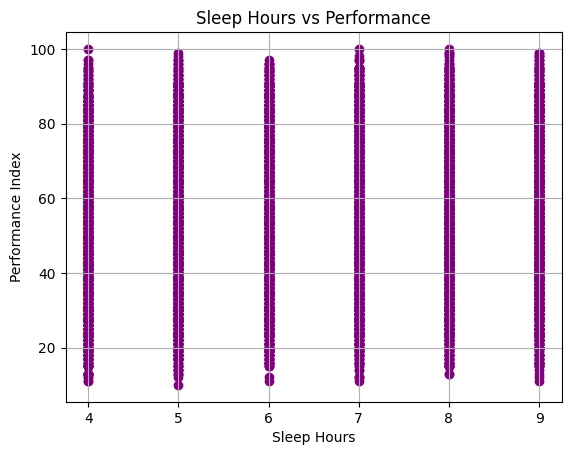

In [ ]:
plt.scatter(df['Sleep Hours'], df['Performance Index'], color='purple')
plt.title('Sleep Hours vs Performance')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

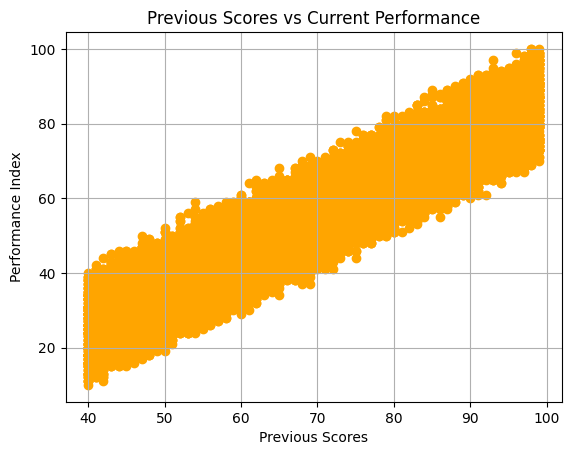

In [ ]:
plt.scatter(df['Previous Scores'], df['Performance Index'], color='orange')
plt.title('Previous Scores vs Current Performance')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.count()

,0
Hours Studied,9873
Previous Scores,9873
Extracurricular Activities,9873
Sleep Hours,9873
Sample Question Papers Practiced,9873
Performance Index,9873


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.count()

,0
Hours Studied,9873
Previous Scores,9873
Extracurricular Activities,9873
Sleep Hours,9873
Sample Question Papers Practiced,9873
Performance Index,9873


In [ ]:
print(df.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


# Preprocessing and Model Compiling

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Extracurricular Activities' to integer using LabelEncoder
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

# Check Data Types
print(df.dtypes)

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [ ]:
# df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)

In [ ]:
# Convert 'Performance Index' to integer by rounding
df['Performance Index'] = df['Performance Index'].round().astype(int)

# Display the data types
print(df.dtypes)

Hours Studied                       int64
Previous Scores                     int64
Extracurricular Activities          int64
Sleep Hours                         int64
Sample Question Papers Practiced    int64
Performance Index                   int64
dtype: object


In [ ]:
df.count()

,0
Hours Studied,9873
Previous Scores,9873
Extracurricular Activities,9873
Sleep Hours,9873
Sample Question Papers Practiced,9873
Performance Index,9873


In [ ]:
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features and target variable
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that standardizes the data and then fits a linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the test data
y_pred_linear = pipeline.predict(X_test)

# Calculate and print accuracy metrics
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Print the results
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 1.65
Mean Squared Error: 4.31
R-squared: 0.99


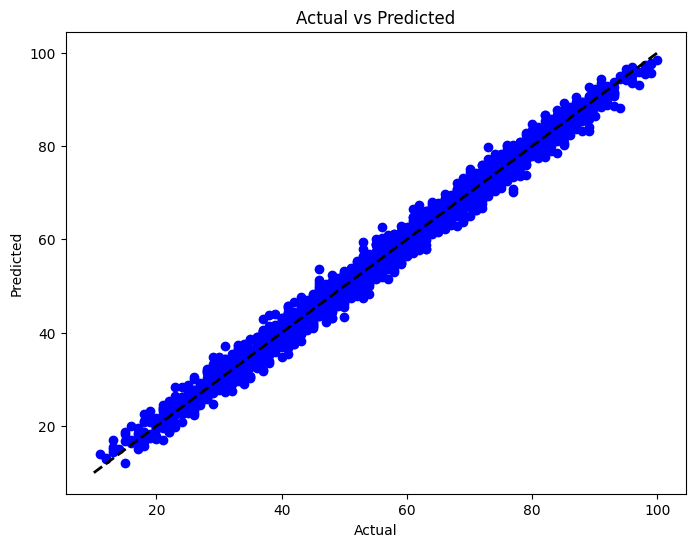

In [ ]:
# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Polynomial Regression Approach

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression Pipeline
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),  # You can change the degree
    ('linear_regression', LinearRegression())
])

# Fit the polynomial regression pipeline to the training data
poly_pipeline.fit(X_train, y_train)

# Predict using the polynomial regression model
y_pred_poly = poly_pipeline.predict(X_test)

In [ ]:
# Calculate and print accuracy metrics for both models
def print_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Absolute Error: {mae:.2f}')
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - R-squared: {r2:.2f}\n')

print_metrics(y_test, y_pred_poly, 'Polynomial Regression')

Polynomial Regression - Mean Absolute Error: 1.65
Polynomial Regression - Mean Squared Error: 4.31
Polynomial Regression - R-squared: 0.99



# Comparison between the 2 Models

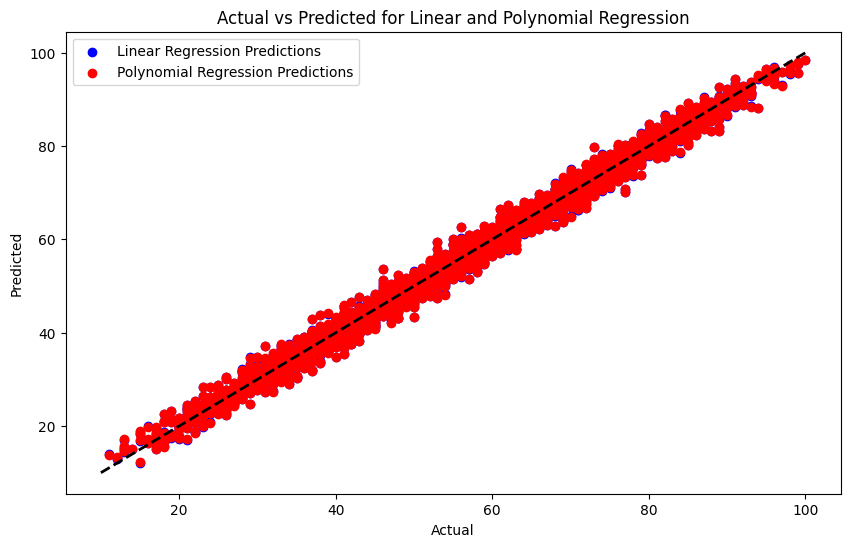

In [ ]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Regression Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Linear and Polynomial Regression')
plt.legend()
plt.show()